In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.base import clone

import os
print(os.listdir("/Users/colette/Downloads/fashionmnist"))

['t10k-images-idx3-ubyte', 'fashion-mnist_test.csv', 't10k-labels-idx1-ubyte', 'train-images-idx3-ubyte', 'fashion-mnist_train.csv', 'train-labels-idx1-ubyte']


In [28]:
# Reading Train Data
training_df = pd.read_csv("/Users/colette/Downloads/fashionmnist/fashion-mnist_train.csv")
print("Shape of Train Data: " + str(training_df.shape))

Shape of Train Data: (60000, 785)


In [29]:
# First 5 rows of train data
training_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Reading Test Data
test_df = pd.read_csv("/Users/colette/Downloads/fashionmnist/fashion-mnist_test.csv")
print("Shape of Test Data: " + str(test_df.shape))

Shape of Test Data: (10000, 785)


In [31]:
test_df.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
X_train = training_df.drop(["label"], axis=1)
y_train = training_df.label

X_test = test_df.drop(["label"], axis=1)
y_test = test_df.label

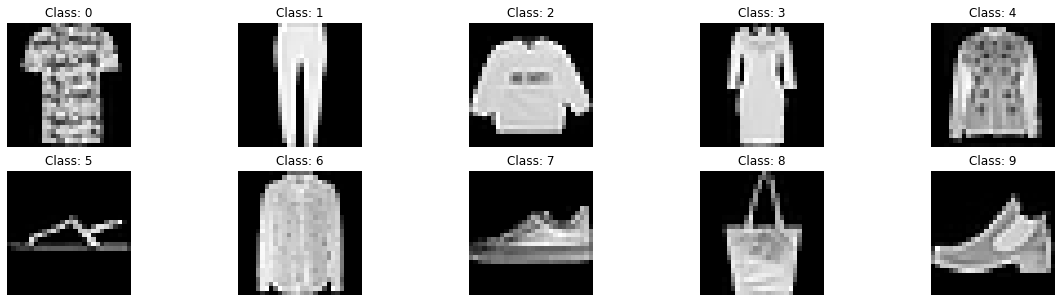

In [33]:
plt.figure(figsize=(20,5))

for i in range(10):
    plt.subplot(2,5,i+1)
    img = training_df[training_df.label==i].iloc[0,1:].values
    img = img.reshape((28,28))
    plt.imshow(img, cmap='gray')
    plt.title("Class: " + str(i))
    plt.axis('off')
    
plt.show()

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [35]:
# Normalization
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape
#X_train = X_train.values.reshape(-1, 28, 28, 1)
#X_test = X_test.values.reshape(-1, 28, 28, 1)
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)

X_train Shape:  (60000, 784)
X_test Shape:  (10000, 784)


In [38]:
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
rbm = BernoulliRBM(random_state=0, verbose=True)

classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

In [41]:
# Hyper-parameters. These were set by cross-validation,
# using a GridSearchCV. Here we are not performing cross-validation to
# save time.
rbm.learning_rate = 0.06
rbm.n_iter = 20
# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 100
logistic.C = 6000

# Training RBM-Logistic Pipeline
classifier.fit(X_train, y_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -226.56, time = 6.34s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -218.00, time = 6.92s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -217.48, time = 6.96s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -219.63, time = 6.80s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -215.08, time = 6.72s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -216.29, time = 6.81s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -210.39, time = 6.82s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -212.93, time = 6.66s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -218.31, time = 8.94s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -207.32, time = 9.48s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -212.58, time = 7.05s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -215.91, time = 7.11s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -215.67, time = 7.06s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -207.91, time = 7.24s
[BernoulliRBM] 

/Users/colette/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/colette/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('rbm',
                 BernoulliRBM(batch_size=10, learning_rate=0.06,
                              n_components=100, n_iter=20, random_state=0,
                              verbose=True)),
                ('logistic',
                 LogisticRegression(C=6000, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [45]:
pixel_classifier = clone(logistic)
pixel_classifier.C = 100.
pixel_classifier.fit(X_train, y_train)

/Users/colette/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/colette/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
# Evaluation
from sklearn.metrics import classification_report

Y_pred = classifier.predict(X_test)
print("Logistic regression using RBM features:\n%s\n" % (
    classification_report(y_test, Y_pred)))

Y_pred = pixel_classifier.predict(X_test)
print("Logistic regression using raw pixel features:\n%s\n" % (
    classification_report(y_test, Y_pred)))

Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76      1000
           1       0.99      0.94      0.96      1000
           2       0.61      0.60      0.61      1000
           3       0.75      0.88      0.81      1000
           4       0.65      0.65      0.65      1000
           5       0.94      0.86      0.90      1000
           6       0.50      0.40      0.45      1000
           7       0.87      0.88      0.88      1000
           8       0.91      0.97      0.94      1000
           9       0.86      0.93      0.89      1000

    accuracy                           0.79     10000
   macro avg       0.78      0.79      0.78     10000
weighted avg       0.78      0.79      0.78     10000


Logistic regression using raw pixel features:
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1000
           1       0.96      0.97      0.96  